In [1]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from collections import deque
import math

In [2]:
def read_net(folder, file_name, skip=4):
    """Read network"""
    G = nx.Graph(name = file_name)  # define empty graph
    with open(os.path.join(folder, file_name), 'r') as f:
        for i in range(skip):
            f.readline()
        
        # add nodes
        for line in f:
            if line.startswith("#"):
              node = line.split()
              if len(node) == 4:
                G.add_node(int(node[1]) - 1, label=node[2].strip('\"'))
            else: 
              # add edges
              node1_str, node2_str = line.split()[:2]
              G.add_edge(int(node1_str)-1, int(node2_str)-1)

    return G

## 1.3

In [9]:
def get_component(G, N, i):
  # return list of nodes in connected component containing (i)
  C = []
  S = []
  # DFS
  S.append(i)
  N.remove(i)
  while S:
    i = S.pop()
    C.append(i)
    for j in G[i]:
      if j in N:
        N.remove(j)
        S.append(j)
  return C

def get_components(G):
  # return list of connected components
  C = []
  N = set(range(len(G)))
  while N:
    C.append(get_component(G, N, next(iter(N))))
  return C

In [11]:
G = nx.read_adjlist('data/enron', create_using=nx.DiGraph())
G1 = [[] for _ in range(len(G.nodes))]
G2 = [[] for _ in range(len(G.nodes))]
for edge in G.edges():
  node1_str, node2_str = edge[0], edge[1]
  # read edge as a pair of nodes
  node1, node2 = int(node1_str)-1, int(node2_str)-1
  G1[node1].append(node2)
  G2[node2].append(node1)

In [12]:
components_one = get_components(G1)
components_two = get_components(G2)

In [13]:
print(len(components_one), len(components_two))

9944 68820


## 1.5

In [3]:
def get_distance_for_node(G, i):
    # empty array
    D = [-1] * len(G)
    Q = deque()
    D[i] = 0
    Q.append(i)

    # main algorithm
    while Q:
      i = Q.popleft()
      for j in G[i]: # neighbors
        if D[j] == -1:
          D[j] = D[i] + 1
          Q.append(j)
    return [d for d in D if d > 0]
  
def get_distances_between_nodes(G, d_max=100):
    nodes = G.nodes()
    D = [0 for _ in range(d_max)]
    for i in nodes:
      d = get_distance_for_node(G, i)
      for v in d:
        D[v] += 1
    return D

def get_d90(D):
    c = math.ceil(np.sum(D) * 0.9)
    sum = 0
    for i in range(len(D)):
      sum += D[i]
      if sum >= c:
        return i

In [4]:
graph = read_net('data', 'aps_2010_2011')
distances = get_distances_between_nodes(graph)
d90 = get_d90(distances)
print(d90)

15


In [5]:
graph = read_net('data', 'aps_2010_2012')
distances = get_distances_between_nodes(graph)
d90 = get_d90(distances)
print(d90)

13


In [6]:
graph = read_net('data', 'aps_2010_2013')
distances = get_distances_between_nodes(graph)
d90 = get_d90(distances)
print(d90)

0


## 2.3

In [7]:
def build_erdos_renyi_graph(n, m):
    """Build erdos-renyi graph with n nodes and m edges"""
    H = set()
    G = nx.Graph(name=f"erdos_renyi_{n}_{m}")
    
    # add nodes
    for i in range(n):
      G.add_node(i, label=str(i+1))

    edges = []
    # add edges to the list
    while len(edges) < m:
      i = random.randint(0, n-1)
      j = random.randint(0, n-1)
      if i != j:
        edges.append((i, j))

    G.add_edges_from(edges)
    return G

C:\Users\matic\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


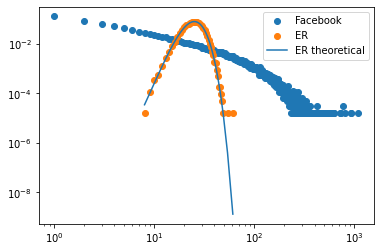

In [8]:
def calc_theoretical_dist(avg_degree, degrees):
  dist = []
  for d in degrees:
    dist.append( (pow(avg_degree, d) * math.exp(-avg_degree)) / math.factorial(d) )
  return dist


graph = nx.read_edgelist("data/facebook", comments="#")
degrees = np.array(graph.degree(), dtype='uint')
k, count = np.unique(degrees[:, 1], return_counts=True)

random_graph = build_erdos_renyi_graph(graph.number_of_nodes(), graph.number_of_edges())
degrees = np.array(random_graph.degree(), dtype='uint')
k2, count2 = np.unique(degrees[:, 1], return_counts=True)

avg_degree = 2 * graph.number_of_edges() / graph.number_of_nodes()
theoretical_dist = calc_theoretical_dist(avg_degree, k2)

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(k, count/graph.number_of_nodes() , label="Facebook")
plt.scatter(k2, count2/graph.number_of_nodes() , label="ER")
plt.plot(k2, theoretical_dist, label="ER theoretical")
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
plt.savefig("pk_distributions")
fig.show()